In [2]:
#Which wine varieties typically received the most points?

                 #######################          LIBRARIES                 #######################

#Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

                 #######################          DATAFRAME PREPARATION    #######################

#open the csv file and read as dataframe
wine = pd.read_csv("/Users/atyam/Desktop/M&M/winemag-data-130k-v2.csv")
#read few rows and all columns
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:

       #######################          DATAFRAME CLEANING    #######################

#Check the dataframe for duplicates. Using keep = first argument will show only the repeated row of the actual row.
duplicate_first = wine[wine.duplicated('description',keep="first")].sort_values('description')
print(duplicate_first.head())
print(duplicate_first.count)

        Unnamed: 0 country                                        description  \
67614        67614      US  100% Malbec, it's redolent with dark plums, wi...   
119702      119702      US  100% Sangiovese, this pale pink wine has notes...   
100745      100745  France  87-89 Barrel sample. A pleasurable, perfumed w...   
100744      100744  France  87-89 Barrel sample. Minty aromas give lifted ...   
100743      100743  France  87-89 Barrel sample. With its lovely fresh fru...   

          designation  points  price    province              region_1  \
67614             NaN      87   20.0  Washington     Rattlesnake Hills   
119702         Meadow      88   18.0  Washington  Columbia Valley (WA)   
100745  Barrel sample      88    NaN    Bordeaux          Saint-Julien   
100744  Barrel sample      88    NaN    Bordeaux         Saint-Émilion   
100743  Barrel sample      88    NaN    Bordeaux    Lalande de Pomerol   

               region_2       taster_name taster_twitter_handle  \
6

In [9]:
#Remove duplicates from the dataframe based on the description column, use keep = first argument to keep one and remove 
#other duplicates for that row.
wine.drop_duplicates(subset=['description'], keep="first", inplace = True)
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119955 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               119955 non-null int64
country                  119896 non-null object
description              119955 non-null object
designation              85423 non-null object
points                   119955 non-null int64
price                    111567 non-null float64
province                 119896 non-null object
region_1                 100397 non-null object
region_2                 46760 non-null object
taster_name              95043 non-null object
taster_twitter_handle    90514 non-null object
title                    119955 non-null object
variety                  119954 non-null object
winery                   119955 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.7+ MB


In [10]:
#Drop the unamed column from the dataframe, because index is already created.
winedf = wine.drop(wine.columns[0], axis=1)

In [11]:
#Find the missing values
winedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119955 entries, 0 to 129970
Data columns (total 13 columns):
country                  119896 non-null object
description              119955 non-null object
designation              85423 non-null object
points                   119955 non-null int64
price                    111567 non-null float64
province                 119896 non-null object
region_1                 100397 non-null object
region_2                 46760 non-null object
taster_name              95043 non-null object
taster_twitter_handle    90514 non-null object
title                    119955 non-null object
variety                  119954 non-null object
winery                   119955 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


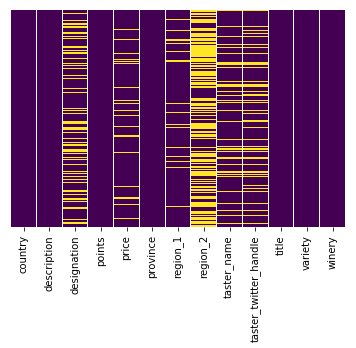

In [12]:
#Analyse the missing values

sns.heatmap(winedf.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [13]:

        #######################          ANALYSIS   #######################
    
#Data clenaing process is not required for this analysis as there are no missing values for the required columns.
#To find which wine variety recieved the most points, Groupby the variety and sum the points and sort in descending order
wine_points = winedf.groupby(['variety'])[['points']].sum().sort_values('points', ascending = False)

In [14]:
wine_points.head()

,points
variety,
Pinot Noir,1097890
Chardonnay,959813
Cabernet Sauvignon,783114
Red Blend,728071
Bordeaux-style Red Blend,576620


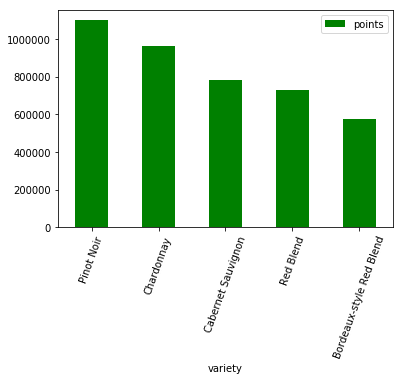

In [24]:
#Bar plot to analyse the results. It ploted top 5 variety which received highest points. 
wine_points.head().plot.bar(rot = 70, color = 'g')